### Fundamentals of Data Analysis Project December 2018


### Problem statement

The box plot is common in data analysis for investigating individual numerical variables.
In this project, you will investigate and explain box plots and their uses. The boxplot
function from the Python package matplotlib.pyplot can be used to create box plots.
Your submission should be in the form of a repository containing a Jupyter notebook in
which you detail your findings. In your notebook, you should:
- Summarise the history of the box plot and situations in which it used.
- Demonstrate the use of the box plot using data of your choosing.
- Explain any relevant terminology such as the terms quartile and percentile.
- Compare the box plot to alternatives.

<img src="https://lsc.studysixsigma.com/wp-content/uploads/sites/6/2015/11/4492.png">

### History of the Boxplot

Box-and-whisker plot, also called boxplot or box plot, graph that summarizes numerical data based on quartiles, which divide a data set into fourths. The box-and-whisker plot is useful for revealing the central tendency and variability of a data set, the distribution (particularly symmetry or skewness) of the data, and the presence of outliers. It is also a powerful graphical technique for comparing samples from two or more different treatments or populations. It was invented in the 1970s by American statistician John Wilder Tukey [1]

The boxplot is constructed to highlight five important characteristics of a data set: the median, the first and third quartiles (and hence the interquartile range as well), and the minimum and maximum. The central tendency, range, symmetry, and presence of outliers in a data set are visible at a glance from a boxplot; And side-by-side boxplots make it easy to make comparisons among different distributions of data.

Where distributions contain extreme values and are highly skewed by outliers, the boxplot is considered a more appropriate statistical tool to use as it is less influenced by these conditions. [2]

The boxplot is made up of five components, carefully chosen to give a robust summary of the distribution
of a dataset:
- the median,
- two hinges, the upper and lower fourths (quartiles),
- the data values adjacent to the upper and lower fences, which lie 1.5 times the inter-fourth range from the median,
- two whiskers that connect the hinges to the fences, and
- (potential) out-liers, individual points further away from the median than the extremes [2]

The box extends from the lower to upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data. Flier points or outliers are those past the end of the whiskers.

Boxplots use robust summary statistics that are always located at actual data points,  are quickly
computable. They are particularly useful for exploratory data analysis comparing distributions across groups. [2]


### Boxplot demonstration using data

I have found an interesting dataset on wikipedia that I hope will help me explain and demonstrate the use of the box plot as a tool for statistical analysis. The dataset I have chosen is All-time top scorers in the All-Ireland Senior Hurling Championship, the data set is available in a table here [3].

I converted the table into a csv and imported it into my jupyter notebook using pandas below. I needed to do some research to overcome a unicode error that arose and to display the Rank column correctly, these issues were successfuly overcome and I was able to import the dataset below.

In [2]:
# import my csv, there was a unicode error fixed by adding on "encoding = "ISO-8859-1" at end of pandas.read [3]
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/JulianConneely/Fundamentals-of-Data-Analysis-Project-Dec-18/master/Data/HurlingTopScorers.csv", encoding = "ISO-8859-1")
df.head(30)

URLError: <urlopen error [SSL: TLSV1_ALERT_ACCESS_DENIED] tlsv1 alert access denied (_ssl.c:1045)>

In [3]:
# converting Rank column from float to integer
pd.options.display.float_format = '{:,.0f}'.format
df.head(30)

NameError: name 'df' is not defined

In [22]:
# shows Summary Statistics for columns with numeric values
df.describe()

Rank  Tally  Average
count           4,930     30       30
mean  543,663,151,521    270        6
std   261,200,321,518    101        1
min                 1    176        4
25%   318,934,750,000    196        5
50%   542,280,000,000    242        6
75%   771,785,750,000    285        7
max   999,832,000,000    569        9

My first boxplot below uses the Seaborn library to plot the different Era's that the top scorers played in against their Tally of total points scored. The middle box represents 50% of the data, the range of data from lower to upper quartile is referred to as the inter-quartile range so we can see the IQR for each era; for 2000-2018 it is 225 to 300 points; for 1960-1980 it is 100 to 225 points; for 1940-1960 it is 225 to 290 points; and for 1980-2000 it is 125 to 225 points.

An interesting observation obvious from viewing the 2000-2018 boxplot is we have three outliers scoring 432, 504 and 569 points in the modern era putting them way ahead of most of the top 30 scorers of all time. The only other outlier we have is Eddie Keher from 1960-1980 scoring 441 points.

In [1]:


%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x='Era', y='Tally', data=df, palette="Set2")

NameError: name 'df' is not defined

<Figure size 864x432 with 0 Axes>

As outlined above the boxplot is an excellent tool for statistical comparison because of the ease of which the user can understand the distribution at a glance. Lets create another boxplot using y dataset of All-time top scorers in the All-Ireland Senior Hurling Championship, this time using the variables - number of games played (Games) versus Era.

In [4]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Era', y='Games', data=df, palette="Set2")

NameError: name 'df' is not defined

<Figure size 864x432 with 0 Axes>

Using the Matplotlib library and the various Numpy.random distribution functions we can create some data which will help us show how the boxplot can illustrate the various distributions and combine them into one plot. For illustrative purposes lets use the normal, poisson and uniform distributions.

The Normal (or Gaussian) Distribution os often called the bell curve because of its characteristic shape, normal distributions occurs often in nature e.g. it describes the commonly occurring distribution of samples influenced by a large number of tiny, random disturbances, each with its own unique distribution; The Poisson distribution may be useful to model events such as the number of meteorites greater than 1 meter diameter that strike Earth in a year; while in a Uniform Distribution any value within the given interval is equally likely to be drawn by uniform.

Lets give them all the same size 500, the random.normal function has three parameters: mean, standard deviation, and size. The random.poisson function has two paramters, lam (mean and variance) and size; while the random.uniform function also has three parameteres: low, high and size. [4]

Although the boxplots differ in size all four distributions have the exact same amount of samples. The first (normal) and second distribution (poisson) have a notably small IQR when compared to third distribution (uniform). 

The boxplots are clear enough but we can embellish them by adding custom colours, labels and notches to the boxplot(s), this is discussed in more detail below.
 


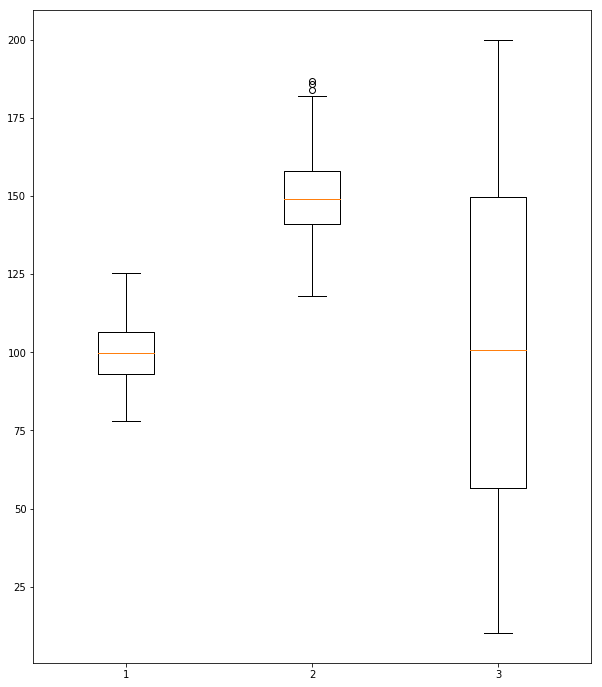

In [52]:
box_1 = np.random.normal(100, 10, 500)
box_2 = np.random.poisson(150, 500)
box_3 = np.random.uniform(10,200,500)


## Combine the different boxplots into a list   
combobox = [box_1, box_2, box_3]

    


# Create a figure:
fig = plt.figure(1, figsize=(10, 12))



# Add a subplot to the current figure:
ax = fig.add_subplot(111) 

# Create the boxplot
cb = ax.boxplot(combobox)




Adding Custom colours and Notches to our Boxplots [5]:

The bp variable in the code snippet above is a python dictionary with keys boxes, whiskers, caps, fliers and the median. The values in this dictionary are the geometric instances that we see in the plot...[6]

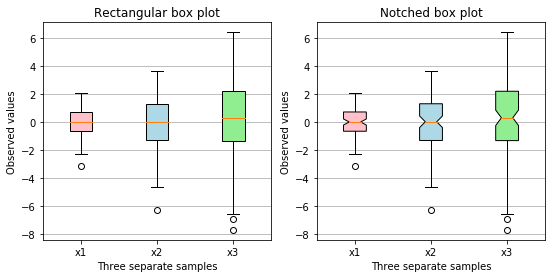

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Random test data
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = axes[0].boxplot(all_data,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[0].set_title('Rectangular box plot')

# notch shape box plot
bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[1].set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()

### Explanation of terminology

Median
The median is the value separating the higher half from the lower half of a data sample, middle of the dataset. The median is indicated by the vertical line that runs down the center of the box. 

Boxplots display two common measures of the variability or spread in a data set:

Range
If you are interested in the spread of all the data, it is represented on a boxplot by the horizontal distance between the smallest value and the largest value, including any outliers. If you were to ignore outliers, the range is illustrated by the distance between the opposite ends of the whiskers.

Interquartile range (IQR)
The middle half of a data set falls within the interquartile range. In a boxplot, the IQR or the middle box represents 50% of the data. It is the range of data from lower to upper quartile.

See also:

Whiskers
Shows the full spread of all the data. They show the highest(upper whisker) and lowest points (lower whisker).

Notch
Is a paramater, if True, will produce a notched box plot. Otherwise, a rectangular boxplot is produced. The notches represent the confidence interval (CI) around the median. 

Confidence Interval (CI)
A Confidence Interval is a range of values we are fairly sure our true value lies in


Upper Quartile
Seventy-five percent of the data fall below the upper quartile. Between the end of the box and the upper whisker.

Lower Quartile
Twenty-five percent of the data fall below the upper quartile. Between the bottom of the box and the lower whisker.
Outlier

Outliers beyond whiskers represent the extremes. They are usually treated as abnormal values usually representing very high or very low values.


### Comparison of Boxplot to alternatives

The Boxplot compared to Histogram, Scatterplot, Violin plots and Beanplots....

The box plot provides a more complete picture of the data than a bar chart or Histogram. Although the Histogram is excellent at displaying the spread of the data, it is not easy to compare histograms of different distributions such as the twelve museum exhibitions shown in this example [10]. PLotting a histogram of each variable would give a clearer picture.



https://www.forbes.com/sites/naomirobbins/2012/01/10/comparing-distributions-with-box-plots/#50f7bbfe2c2c

### References:

1. https://www.britannica.com/science/box-and-whisker-plot
2. https://www.oreilly.com/library/view/statistics-in-a/9781449361129/ch04.html
3. https://en.wikipedia.org/wiki/All-Ireland_Senior_Hurling_Championship_records_and_statistics
4. https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html
5. https://matplotlib.org/gallery/statistics/boxplot_color.html
6. http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
2. http://vita.had.co.nz/papers/boxplots.pdf
3. https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python
3. http://www.physics.csbsju.edu/stats/box2.html
9. https://www.forbes.com/sites/naomirobbins/2012/01/10/comparing-distributions-with-box-plots/#50f7bbfe2c2c
4. <br>
